> Reference: https://github.com/tianjuxue/CIVL5390

In [2]:
import jax
import jax.numpy as np
import matplotlib.pyplot as plt

## Lorenz System

We will study the numerical solutions of Lorenz system using **explicit** and **implicit** Euler methods. 
Then, we will show how to compute the derivatives.

The Lorenz system is defined by three coupled nonlinear ODEs:

$$
\begin{aligned}
\frac{dx}{dt} &= \sigma(y - x) \\
\frac{dy}{dt} &= x(\rho - z) - y \\
\frac{dz}{dt} &= xy - \beta z
\end{aligned}
$$

where $ \mathbf{y} = [x, y, z]^T $ is the state vector, and $ \sigma, \rho, \beta $ are system parameters.

We first define the RHS of the Lorenz system

In [7]:
def lorenz_rhs(state, params):
    x, y, z = state
    rho, sigma, beta = params
    return np.array([sigma * (y-x), x*(rho-z)-y, x*y-beta*z])

## Explicit Methods

### Explicit Euler Method

The explicit Euler method approximates:

$$
\mathbf{y}_{n+1} = \mathbf{y}_n + \Delta t \cdot \mathbf{f}(\mathbf{y}_n, t_n)
$$

For the Lorenz system:

$$
\begin{aligned}
x_{n+1} &= x_n + \Delta t[\sigma(y_n - x_n)] \\
y_{n+1} &= y_n + \Delta t[x_n(\rho - z_n) - y_n] \\
z_{n+1} &= z_n + \Delta t[x_n y_n - \beta z_n]
\end{aligned}
$$

**Note**: The explicit Euler updating scheme fits into the framework we discussed in Lecture 10:
$$
\begin{aligned}
\boldsymbol{U}^{n} = \boldsymbol{F}(\boldsymbol{U}^{n-1}, \boldsymbol{\Theta})
\end{aligned}
$$
where $\boldsymbol{U}^{n}=\mathbf{y}_n$ and $\boldsymbol{\Theta}=[\sigma, \rho, \beta]$

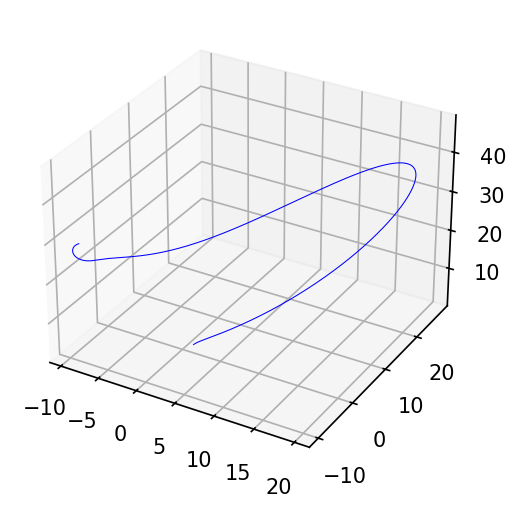

In [9]:
# Integration parameters
dt = 0.001
# total_time = 1.0
total_time = 1.
num_steps = int(total_time / dt)

# Lorenz system parameters
params = np.array([28.0, 10.0, 8.0/3.0])  # rho, sigma, beta
# Initial conditions
y0 = np.array([1.0, 1.0, 1.0])

# Integration step
def explicit_euler(y_current):
    y_new = y_current + dt * lorenz_rhs(y_current, params)
    return y_new

def step(y_current, _):
    y_new = explicit_euler(y_current)
    return (y_new, y_new)

# Time evolution
y, y_time = jax.lax.scan(step, init=(y0), xs=None, length=num_steps)

# Visualize the results
fig = plt.figure(figsize=(6, 4), dpi=150)
ax = fig.add_subplot(projection='3d')
x0, x1, x2 = y_time.T
ax.plot(x0, x1, x2, lw=0.5, color='b')

## Implicit methods